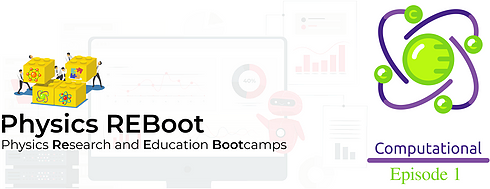

<h1>Physics Research and Education Bootcamp - Computational | Episode 1<h1>

License: CC BY-NC-SA  https://creativecommons.org/licenses/by-nc-sa/4.0/

Last Modification: Sept. 3, 2021

# ***Preambulo***

Primero carguemos los paquetes de Python necesarios para trabajar.

In [ ]:
import numpy as np
from tqdm import tqdm # Si eres impaciente como yo querras saber cuanto tiempo falta para que un codigo termine de ejecutarse
import matplotlib.pyplot as plt

# **Distribuyendo Empanadas con *Montecarlo***



Recordamos el problema de las empanadas que vimos el segundo día. En ese momento, estudiamos distintos métodos para resolver el problema de estimar la probabilidad de que alguien obtenga una empanada repetida al distribuirlas entre un grupo de personas. Entre las soluciones que exploramos estan:

  * Métodos algebráicos
  * Métodos de fuerza bruta
  * Métodos de grafos
  * ?

Hoy estudiaremos como resolver este problema via Montecarlo.

# **Teoría**

Recordemos brevemente que, en el caso de $N$ personas, existen $2N!$ maneras de distribuir 2 empanadas para cada una. Para $N$ pequeño es posible contar cada caso. Para 7 personas ya existen 1,278,945,280 casos. Un approach de fuerza bruta no es práctico en este caso.

Ya que Montecarlo implica la evaluación de un número grande de múltiples escenarios (menor que el total), existe la posibilidad de que muchos casos favorables (sin repeticiones) y desfavorables se nos escapen.

Sin embargo, es posible evaluar varios escenarios de distribución y estimar el cociente entre los casos favorables y desfavorables. Este valor es constante y dependiente del caso de distribución de empanadas que estamos considerando.

Este cociente esta relacionado con la probabilidad de obtener un caso favorable o desfavorable mediante:

\\


\begin{align}
p(x=F) + p(x=D) &= 1 \\
\frac{F}{T} + \frac{D}{T} &= 1
\end{align} 


\\

Equivalentemente:


\begin{align}
\frac{F}{D} + 1 &= \frac{T}{D} \\
\frac{1}{\frac{F}{D}+1} &= \frac{D}{T}
\end{align}


\\

Recordando, a traves de Montecarlo podemos estimar este cociente a través de:

\begin{align}
\left \langle \frac{F}{D} \right \rangle = \frac{1}{M}\sum_{i=1}^{M} \frac{F_{i}}{D_{i}}
\end{align}
La desviación estándard de este estimador esta dada por:
\begin{align}
 \sigma = \frac{1}{\sqrt{M}}
\end{align}

\\

Debemos empezar entonces creando un código que nos permita generar escenarios...


# Práctica

In [ ]:
def samples(n,m,k,nsamples):
    """

    Parameters
    ----------
    n : int
        Numero de personas.
    m : int
        Numero de empanadas por persona.
    k : int
        Numero de sabores de empanadas.
    nsamples: int
        Numero de samples
        
    Returns
    -------
    None.

    """
    # El numero total de empanadas, para que le toque m empanadas a cada uno
    N_empanadas = m*n
    
    # Necesitamos calcular un vector que represente las empanadas para luego distribuirlas. 
    Empanadas = np.array([i for i in range(k) for j in range(m)])
    
    # Ahora generamos escenarios en los cuales distribuimos al azar las empanadas representadas por el vector previo. 
    # Este proceso lo repetiremos nsamples veces.  Hay muchas maneras de escribir esto
    Samples = [np.random.choice(Empanadas,size = N_empanadas, replace=False)\
               for i in range(nsamples)]
    return Samples
n_emp = 3
array = samples(3,n_emp,3,5)
print(array)
sum([revisar_duplicaciones(i,n_emp) for i in array])

[array([2, 1, 2, 1, 0, 1, 2, 0, 0]), array([1, 1, 2, 1, 2, 0, 0, 0, 2]), array([2, 1, 2, 2, 0, 1, 1, 0, 0]), array([1, 0, 2, 0, 1, 2, 1, 0, 2]), array([2, 1, 0, 1, 0, 0, 1, 2, 2])]


4

Ahora necesitamos un código que nos permita verificar si hay o no duplicaciones dentro de cada muestra. Por duplicaciones entedemos los casos en los que dos entradas consecutivas de la muestra tienen el mismo numero asignado:

`sample[0] == sample[1]`

`sample[2] == sample[3]`

`...`

`sample[n-2] == sample[n-1]`

In [ ]:
def revisar_duplicaciones(v,n):
    """

    Parameters
    ----------
    v : Array
        el vector que queremos revisar si hay casos de duplicaciones.
    n : Número de "saltos" que queremos hacerle al array v para estudiar los
        casos de duplicación

    Returns
    -------
    dup : int
        [0,1] Resultado si hay o no duplicacion.

    """
    dup = 0
    i = 0
    while i<len(v)-(n-1) and dup == 0 :
        # Aqui verificamos directamente la condicion, de ocurrir al menos una vez
        # detenemos el calculo. No nos interesa saber cuanto se repite
        for j in range(i,i+n):
          for k in range(i,i+n):
            if j != k:
              if v[j] == v[k]:
                dup = 1
              else:
                pass
            else:
              pass
        i+=n
    return dup

Ahora incluimos este código dentro de nuestra función de muestreo:

In [ ]:
def samples(n,m,k,nsamples):
    """

    Parameters
    ----------
    n : int
        Numero de personas.
    m : int
        Numero de empanadas por persona.
    k : int
        Numero de sabores de empanadas.
    nsamples: int
        Numero de samples
        
    Returns
    -------
    None.

    """
    # El numero total de empanadas, para que le toque m empanadas a cada uno
    N_empanadas = m*n
    
    # Necesitamos calcular un vector que represente las empanadas para luego distribuirlas.
    Empanadas = np.array([i for i in range(k) for j in range(m)])
    
    # Ahora generamos escenarios en los cuales distribuimos al azar las empanadas representadas por el vector previo. 
    # Este proceso lo repetiremos nsamples veces.
    Samples = [np.random.choice(Empanadas,size = N_empanadas, replace=False)\
               for i in range(nsamples)]

    # Evaluamos cada muestra para ver si hay repeticiones o no
    Duplicaciones = sum([revisar_duplicaciones(sample,m) for sample in Samples])

    # El numero de muestras favorables es la diferencia entre el numero total de muestras y las muestras con repeticiones
    Favorables = nsamples-Duplicaciones

    # Retornamos el numero de casos favorables y el numero de repeticiones
    return Favorables,Duplicaciones

Finalmente implementamos el código de Montecarlo. Repetimos el proceso de muestreo un cierto número de iteraciones `niter`, y luego cálculamos la media y la desviación estándard del estimador del cociente:

In [ ]:
def Montecarlo(npersonas,nempanadas,nsabores,nsamples,niter):
    """

    Parameters
    ----------
    npersonas : int
        Numero total de personas.
    nempanadas : int
        Numero de empanadas por persona.
    nsabores : int
        Numero de sabores de empanadas.
    nsamples : int
        Numero de muestras por cada iteracion.
    niter : int
        Numero de iteraciones para estimacion por Montecarlo.

    Returns
    -------
    Tasa_Favorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos favorables 
        para cada iteracion.
    Tasa_Desfavorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos desfavorables 
        para cada iteracion.

    """
    Evals = np.array([samples(npersonas,nempanadas,nsabores,nsamples) for i in tqdm(range(niter))])
    Radio_DF = Evals[:,1]/Evals[:,0]
    Tasa_Favorables = 1/((Radio_DF)+1)
    Tasa_Desfavorables = 1 - Tasa_Favorables
    Tasa_Favorables_media = np.mean(Tasa_Favorables)
    Tasa_Desfavorables_media = np.mean(Tasa_Desfavorables)
    print('\n La tasa de casos favorables media es : {:.4f}'.format(Tasa_Favorables_media))
    print('\n La tasa de casos desfavorables media es : {:.4f}'.format(Tasa_Desfavorables_media))    
    return Tasa_Favorables,Tasa_Desfavorables
    
def Analisis(T_F,T_D):
  T_Fm = np.mean(T_F)
  T_Fs = np.std(T_F)
  T_Dm = np.mean(T_D)
  T_Ds = np.std(T_D)
  print('\n La tasa de casos favorables media es : {:.4f} +/- {:.4f}'.format(T_Fm,T_Fs))
  print('\n La tasa de casos desfavorables media es : {:.4f} +/- {:.4f}'.format(T_Dm,T_Ds)) 

Ahora podemos ejecutar el código y analizar los resultados

**Caso 1**: 3 personas, 2 empanadas por persona, 3 sabores de empanadas:

In [ ]:
Tasa_F,Tasa_D = Montecarlo(3,2,3,10000,1000)

100%|██████████| 1000/1000 [04:05<00:00,  4.07it/s]


 La tasa de casos favorables media es : 0.5332

 La tasa de casos desfavorables media es : 0.4668


In [ ]:
Analisis(Tasa_F,Tasa_D)


 La tasa de casos favorables media es : 0.5332 +/- 0.0051

 La tasa de casos desfavorables media es : 0.4668 +/- 0.0051


Recordamos que de acuerdo a la solución teórica:

$\frac{D}{T} = \frac{7}{15} \approx 0.4666...$

$\frac{F}{T} = \frac{8}{15} \approx 0.5333...$

Podemos concluir que hemos podido estimar satisfactoriamente estas probabilidades.

Si ahora hacemos un histograma con los datos podemos observar un estimado de la distribución de los casos favorables y desfavorables

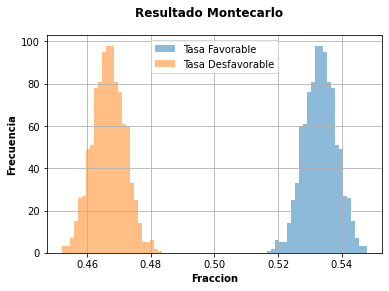

In [ ]:
  plt.figure()
  plt.suptitle('Resultado Montecarlo',fontweight='bold')
  plt.hist(Tasa_F,25,label='Tasa Favorable',alpha=0.5)
  plt.hist(Tasa_D,25,label='Tasa Desfavorable',alpha=0.5)
  plt.ylabel('Frecuencia',fontweight='bold')
  plt.xlabel('Fraccion',fontweight='bold')
  plt.grid(True)
  plt.legend()

**Caso 2**: 3 personas, 3 empanadas por persona y 3 sabores de empanadas: 

In [ ]:
Tasa_F2,Tasa_D2 = Montecarlo(3,3,3,10000,1000)

100%|██████████| 1000/1000 [04:08<00:00,  4.02it/s]


 La tasa de casos favorables media es : 0.1286

 La tasa de casos desfavorables media es : 0.8714


In [ ]:
Analisis(Tasa_F2,Tasa_D2)


 La tasa de casos favorables media es : 0.1286 +/- 0.0033

 La tasa de casos desfavorables media es : 0.8714 +/- 0.0033


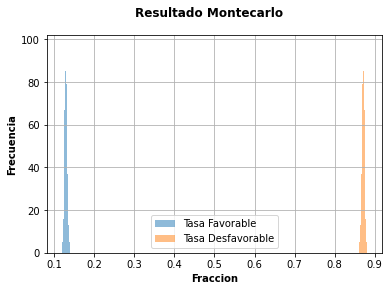

In [ ]:
plt.figure()
plt.suptitle('Resultado Montecarlo',fontweight='bold')
plt.hist(Tasa_F2,25,label='Tasa Favorable',alpha=0.5)
plt.hist(Tasa_D2,25,label='Tasa Desfavorable',alpha=0.5)
plt.ylabel('Frecuencia',fontweight='bold')
plt.xlabel('Fraccion',fontweight='bold')
plt.grid(True)
plt.legend()

**Caso 3**: 4 personas, 3 empanadas por persona y 4 sabores de empanadas:

In [ ]:
Tasa_F3,Tasa_D3 = Montecarlo(4,3,4,10000,1000)

100%|██████████| 1000/1000 [04:16<00:00,  3.90it/s]


 La tasa de casos favorables media es : 0.0842

 La tasa de casos desfavorables media es : 0.9158


In [ ]:
Analisis(Tasa_F3,Tasa_D3)


 La tasa de casos favorables media es : 0.0842 +/- 0.0028

 La tasa de casos desfavorables media es : 0.9158 +/- 0.0028


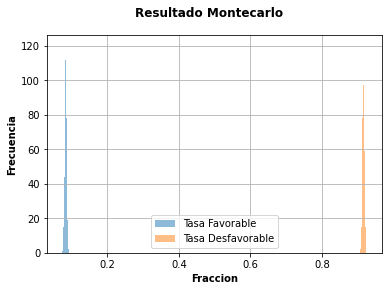

In [ ]:
plt.figure()
plt.suptitle('Resultado Montecarlo',fontweight='bold')
plt.hist(Tasa_F3,25,label='Tasa Favorable',alpha=0.5)
plt.hist(Tasa_D3,25,label='Tasa Desfavorable',alpha=0.5)
plt.ylabel('Frecuencia',fontweight='bold')
plt.xlabel('Fraccion',fontweight='bold')
plt.grid(True)
plt.legend()

**Caso 4**: 4 personas, 4 empanadas por persona y 4 sabores de empanadas:

In [ ]:
Tasa_F4,Tasa_D4 = Montecarlo(4,4,4,10000,1000)

100%|██████████| 1000/1000 [04:22<00:00,  3.82it/s]


 La tasa de casos favorables media es : 0.0052

 La tasa de casos desfavorables media es : 0.9948


In [ ]:
Analisis(Tasa_F4,Tasa_D4)


 La tasa de casos favorables media es : 0.0052 +/- 0.0007

 La tasa de casos desfavorables media es : 0.9948 +/- 0.0007


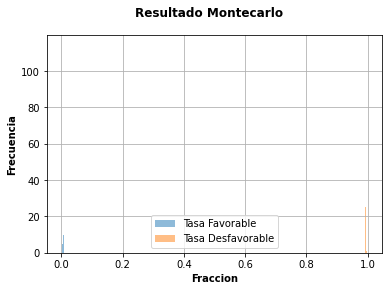

In [ ]:
plt.figure()
plt.suptitle('Resultado Montecarlo',fontweight='bold')
plt.hist(Tasa_F4,25,label='Tasa Favorable',alpha=0.5)
plt.hist(Tasa_D4,25,label='Tasa Desfavorable',alpha=0.5)
plt.ylabel('Frecuencia',fontweight='bold')
plt.xlabel('Fraccion',fontweight='bold')
plt.grid(True)
plt.legend()

La siguiente es una adaptación del código original para 3 empanadas por persona hecho con el objetivo de comparar los resultados obtenidos hasta ahora con los que se pueden obtener si uno cambia manualmente el código para cada caso:

**1.** Adaptamos la función `revisar_duplicaciones(v)` para que verifique si existen dos elementos iguales en el vector $v$ cada $i+3$ elementos:

In [ ]:
def revisar_duplicaciones(v):
    """

    Parameters
    ----------
    v : Array
        el vector que queremos revisar si hay casos de duplicaciones.

    Returns
    -------
    dup : int
        [0,1] Resultado si hay o no duplicación.

    """
    dup = 0
    i = 0
    # Nuevamente hay muchas maneras de resolver esto
    while i<len(v)-1 and dup == 0 :
      # Aqui verificamos directamente la condicion, de ocurrir al menos una vez
      # detenemos el calculo. No nos interesa saber cuanto se repite.
        if v[i] == v[i+1] or v[i] == v[i+2] or v[i+1] == v[i+2]:
            dup = 1
        else:
            i+=3
    return dup

**2**: Cambiamos la función `samples(n,k,nsamples)` para que ahora a cada persona le correspondan 3 empanadas (el tamaño del vector será un múltiplo de 3): 

In [ ]:
def samples(n,k,nsamples):
    """

    Parameters
    ----------
    n : int
        Numero de personas.
    k : int
        Numero de sabores de empanadas.
    nsamples: int
        Numero de samples
        
    Returns
    -------
    Favorables : int
      Numero de casos favorables en la muestra
    Desfavorables : int
      Numero de casos desfavorables en la muestra

    """
    # El numero total de empanadas, para que le toquen 3 a cada uno
    N_empanadas = 3*n

    # Necesitamos calcular un vector que represente las empanadas para luego distribuirlas. 
    # Ya que son tres empanadas para cada uno deberia producir lo siguiente:  [0,0,0,1,1,1,2,2,2,3,3,3,4,4,4,5,5,5.......,k,k,k]
    Empanadas = np.array([i for i in range(k) for j in range(3)])

    # Ahora generamos escenarios en los cuales distribuimos al azar las empanadas representadas por el vector previo. 
    # Este proceso lo repetiremos nsamples veces.  Hay muchas maneras de escribir esto
    Samples = [np.random.choice(Empanadas,size = N_empanadas, replace=False)\
               for i in range(nsamples)]

    # Evaluamos cada muestra para ver si hay duplicaciones o no
    Duplicaciones = sum([revisar_duplicaciones(sample) for sample in Samples])

    # El numero de muestras favorables es la diferencia entre el numero total de muestras y las muestras con duplicaciones
    Favorables = nsamples-Duplicaciones

    # Retornamos el numero de casos favorables y el numero de Duplicaciones
    return Favorables,Duplicaciones

**3.** Finalmente corremos la función `montecarlo` y hacemos el análisis de los resultados:

In [ ]:
def Montecarlo(npersonas,nsabores,nsamples,niter):
    """

    Parameters
    ----------
    npersonas : int
        Numero total de personas.
    nsabores : int
        Numero de sabores de empanadas.
    nsamples : int
        Numero de muestras por cada iteracion.
    niter : int
        Numero de iteraciones para estimacion por Montecarlo.

    Returns
    -------
    Tasa_Favorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos favorables 
        para cada iteracion.
    Tasa_Desfavorables : float array
        Arreglo (niter x 1) con los valores de la tasa de casos desfavorables 
        para cada iteracion.

    """
    Evals = np.array([samples(npersonas,nsabores,nsamples) for i in tqdm(range(niter))])
    Radio_DF = Evals[:,1]/Evals[:,0]
    Tasa_Favorables = 1/((Radio_DF)+1)
    Tasa_Desfavorables = 1 - Tasa_Favorables
    Tasa_Favorables_media = np.mean(Tasa_Favorables)
    Tasa_Desfavorables_media = np.mean(Tasa_Desfavorables)
    print('\n La tasa de casos favorables media es : {:.4f}'.format(Tasa_Favorables_media))
    print('\n La tasa de casos desfavorables media es : {:.4f}'.format(Tasa_Desfavorables_media))    
    return Tasa_Favorables,Tasa_Desfavorables
    
def Analisis(T_F,T_D):
  T_Fm = np.mean(T_F)
  T_Fs = np.std(T_F)
  T_Dm = np.mean(T_D)
  T_Ds = np.std(T_D)
  print('\n La tasa de casos favorables media es : {:.4f} +/- {:.4f}'.format(T_Fm,T_Fs))
  print('\n La tasa de casos desfavorables media es : {:.4f} +/- {:.4f}'.format(T_Dm,T_Ds))

In [ ]:
Tasa_F,Tasa_D = Montecarlo(3,3,10000,1000)

100%|██████████| 1000/1000 [03:31<00:00,  4.73it/s]


 La tasa de casos favorables media es : 0.1285

 La tasa de casos desfavorables media es : 0.8715


# Tarea

Generalice el código que hemos desarrollado para $m$ empanadas por persona. Explore ahora qué ocurre al cambiar el número de peronas $N$, la cantidad de sabores por empanadas $k$ y $m$. Reflexione en los resultados.

# Integrando con Montecarlo:


En las preguntas 3 y 4 del problema de ***Los Policias y las Empanadas*** se nos pide calcular el valor esperado de la velocidad $v$ y de la multa $Multa(v)$ dada por una funcion cuadrática.

Aunque estos ejemplos se pueden resolver analíticamente, hoy los usaremos para ilustrar como a través de ***Montecarlo*** podemos calcular integrales.

Repasando los detalles del problema:

* $v \in U[55,85]$
* $Multa(v) = 5(v-70) + (v-70)^{2}$
* $v_{lim} = 70$

Nos piden calcular:

* $E[v \,| \, v>70]$
* $E[Multa(v) \,|\, v  >70]$


Para comenzar, necesitamos un generador de muestras que genere eventos con $v \in U[70,85]$

In [ ]:
def generar_velocidades(nsamples,vmin,vmax):
  return np.random.uniform(vmin,vmax+1e-3,nsamples)

El siguiente paso es definir la función de multa:

In [ ]:
def Multa(v):
  return 5*(v-70) + ((v-70)**2)

Finalmente definimos un integrador de Montecarlo:

In [ ]:
def Integrador_Montecarlo(x):
  print('El valor esperado es {:.4f} +/- {:.4f}'.format(np.mean(x),np.std(x)))

Generarmos `1e7` muestras y observamos los histogramas correspondientes:

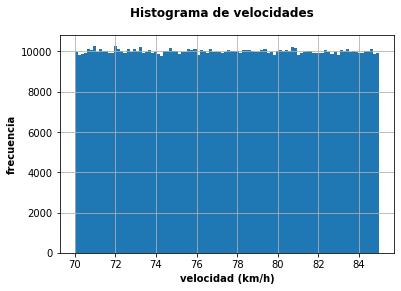

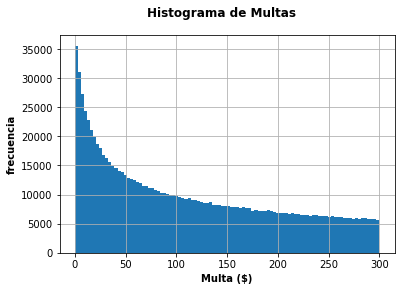

In [ ]:
velocidades = generar_velocidades(1000000,70,85)

Multas = Multa(velocidades)

plt.figure()
plt.suptitle(r'Histograma de velocidades',fontweight='bold')
plt.hist(velocidades,100)
plt.xlabel('velocidad (km/h)',fontweight='bold')
plt.ylabel('frecuencia',fontweight='bold')
plt.grid()

plt.figure()
plt.suptitle(r'Histograma de Multas',fontweight='bold')
plt.hist(Multas,100)
plt.xlabel('Multa ($)',fontweight='bold')
plt.ylabel('frecuencia',fontweight='bold')
plt.grid()

Es evidente cual es el valor esperado de la primera gráfica. De la segunda no es tan obvio.

Ahora simplemente calculamos los valores esperados:

In [ ]:

# Calculamos el valor esperado de la velocidad:
Integrador_Montecarlo(velocidades)

# Calculamos el valor esperado de la multa en $:
Integrador_Montecarlo(Multa(velocidades))

El valor esperado es 77.5062 +/- 4.3315
El valor esperado es 112.6369 +/- 88.2824


Analíticamente podemos calcular (Demuéstrelo usted si aún no lo ha hecho):

* $E[v] = 77.50 \pm 4.33$
* $E[M(v)] = 112.50 \pm 88.21$

# Nota:

La intuición nos puede llevar a resultados erroneos....

Hay que verificar bien y hacer las cuentas.

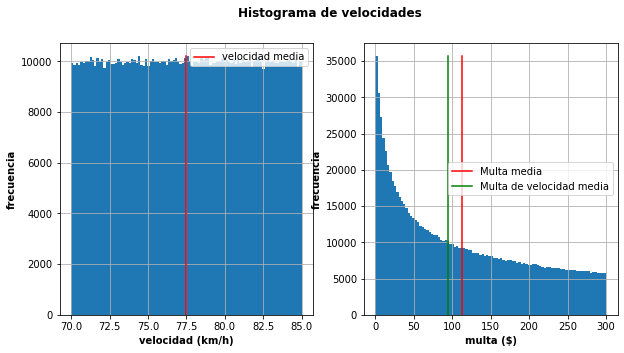

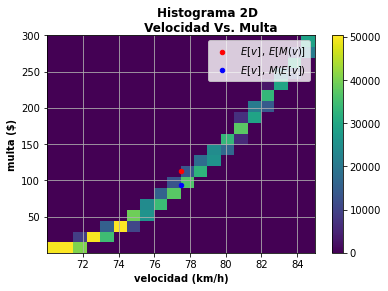

In [ ]:
m_v = np.mean(velocidades)
m_m = np.mean(Multas)

fig = plt.figure(figsize=(10,5))
plt.suptitle(r'Histograma de velocidades',fontweight='bold')
ax1 = fig.add_subplot(1,2,1)
f1 = ax1.hist(velocidades,100)
ax1.plot([m_v, m_v],[0,np.max(f1[0])],label='velocidad media',c='r')
ax1.set_xlabel('velocidad (km/h)',fontweight='bold')
ax1.set_ylabel('frecuencia',fontweight='bold')
ax1.grid()
plt.legend()

ax2 = fig.add_subplot(1,2,2)
f2 = ax2.hist(Multas,100)
ax2.plot([m_m, m_m],[0,np.max(f2[0])],label='Multa media',c='r')
ax2.plot([Multa(m_v),Multa(m_v)],[0,np.max(f2[0])],label='Multa de velocidad media',c='g')
ax2.set_xlabel('multa ($)',fontweight='bold')
ax2.set_ylabel('frecuencia',fontweight='bold')
ax2.grid()
plt.legend()

fig2 = plt.figure()
plt.suptitle('Histograma 2D \n Velocidad Vs. Multa',fontweight='bold')
c = plt.hist2d(velocidades,Multas,20)
plt.scatter(m_v,m_m,label=r'$E[v]\, , \, E[M(v)]$',c='r',s=20)
plt.scatter(m_v,Multa(m_v),label=r'$E[v]\, , \, M(E[v])$',c='blue',s=20)
plt.xlabel('velocidad (km/h)',fontweight='bold')
plt.ylabel('multa ($)',fontweight='bold')
plt.grid()
fig2.colorbar(c[3])
plt.legend()

<h1> $E[f(x)] \neq f(E[x])$ <h1>

\\

<h3>Sólo en casos en los que $f$ es lineal existe una igualdad!<h3>

Version 1.0, Autor : Antonio Figueroa

In [ ]:
#libs summary
import types
def imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            yield val.__name__
list(imports())

['builtins',
 'builtins',
 'IPython.core.shadowns',
 'types',
 'numpy',
 'matplotlib.pyplot']